In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from glob import glob

In [ ]:
data_dir = '/content/drive/MyDrive/GalliformeSpectra A Hen Breed Dataset/GalliformeSpectra A Hen Breed Dataset/Resized_Augmented_Dataset/train(Resized_Augmented)'

In [ ]:
print(data_dir)

/content/drive/MyDrive/GalliformeSpectra A Hen Breed Dataset/GalliformeSpectra A Hen Breed Dataset/Resized_Augmented_Dataset/train(Resized_Augmented)


buckeye_AugRes_001.png


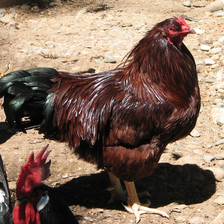

buckeye_AugRes_004.png


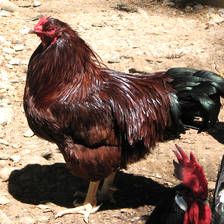

buckeye_AugRes_003.png


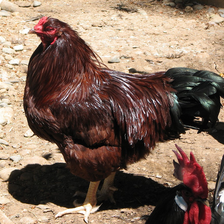

buckeye_AugRes_002.png


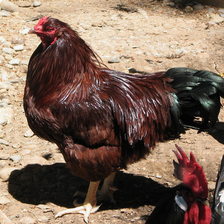

buckeye_AugRes_011.png


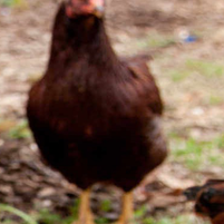

buckeye_AugRes_023.png


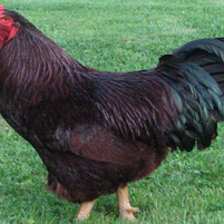

buckeye_AugRes_005.png


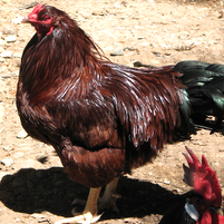

buckeye_AugRes_021.png


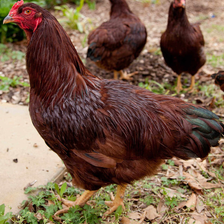

buckeye_AugRes_014.png


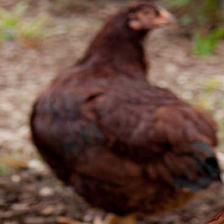

buckeye_AugRes_018.png


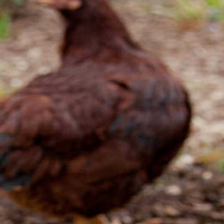

In [ ]:
from PIL import Image
import os
from IPython.display import display
from IPython.display import Image as _Imgdis
folder_buckeye ='/content/drive/MyDrive/GalliformeSpectra A Hen Breed Dataset/GalliformeSpectra A Hen Breed Dataset/Resized_Augmented_Dataset/train(Resized_Augmented)/buckeye'
onlybuckeyefiles = [f for f in os.listdir(folder_buckeye) if os.path.isfile(os.path.join(folder_buckeye, f))]

for i in range(10):
  print(onlybuckeyefiles[i])
  display(_Imgdis(filename=folder_buckeye+ "/" + onlybuckeyefiles[i],width=240,height=240))

In [ ]:
img_height = 180
img_width = 180
batch_size = 32
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    label_mode='categorical',
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 5059 files belonging to 10 classes.
Using 4048 files for training.


In [ ]:
val_ds=tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.3,
    subset="validation",
    seed=123,
    label_mode='categorical',
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 5059 files belonging to 10 classes.
Using 1517 files for validation.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten # Import Flatten

densenet_model=Sequential()
densenet_model.add(tf.keras.layers.Input(shape=(180,180,3))) # Add an input layer to define the shape
pretrained_model= tf.keras.applications.DenseNet121(
    include_top=False,
    weights="imagenet",
    input_shape=(180,180,3),
    pooling='avg',
    classes=10,
    classifier_activation="softmax",
    # name="densenet121",  <-- Remove this line as 'name' is not a valid argument
)
for layer in pretrained_model.layers:
        layer.trainable=False
densenet_model.add(pretrained_model)
densenet_model.add(Flatten()) # Now Flatten is accessible
densenet_model.add(Dense(512,activation='relu'))
densenet_model.add(Dense(256,activation='relu'))
densenet_model.add(Dense(10,activation='softmax'))

densenet_model.summary()

29084464/29084464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 1024)              7037504   
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 512)               524800    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 7696202 (29.36 MB)
Trainable params: 658698 (2.51 MB)
Non-trainable params: 7037504 (26.85 MB)
______________

In [ ]:
densenet_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
epochs=15
history=densenet_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/15
127/127 [==============================] - 138s 1s/step - loss: 1.5576 - accuracy: 0.5632 - val_loss: 0.7769 - val_accuracy: 0.7442
Epoch 2/15
127/127 [==============================] - 59s 460ms/step - loss: 0.6465 - accuracy: 0.7950 - val_loss: 0.7298 - val_accuracy: 0.7647
Epoch 3/15
127/127 [==============================] - 59s 461ms/step - loss: 0.4237 - accuracy: 0.8698 - val_loss: 0.4129 - val_accuracy: 0.8807
Epoch 4/15
127/127 [==============================] - 57s 448ms/step - loss: 0.3097 - accuracy: 0.9022 - val_loss: 0.3446 - val_accuracy: 0.8972
Epoch 5/15
127/127 [==============================] - 57s 443ms/step - loss: 0.2149 - accuracy: 0.9333 - val_loss: 0.2503 - val_accuracy: 0.9328
Epoch 6/15
127/127 [==============================] - 57s 443ms/step - loss: 0.1548 - accuracy: 0.9506 - val_loss: 0.2083 - val_accuracy: 0.9433
Epoch 7/15
127/127 [==============================] - 56s 441ms/step - loss: 0.1122 - accuracy: 0.9684 - val_loss: 0.2087 - val_accu

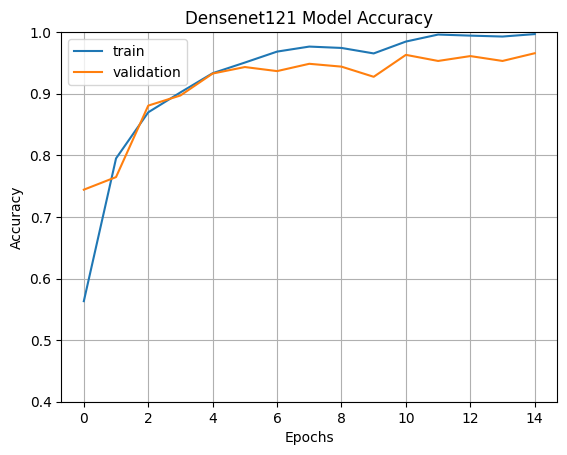

In [ ]:
fig1=plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Densenet121 Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])

In [ ]:
# prompt: download the above graph with 300 dpi

fig1.savefig('accuracy_plot.png', dpi=300)
from google.colab import files
files.download('accuracy_plot.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

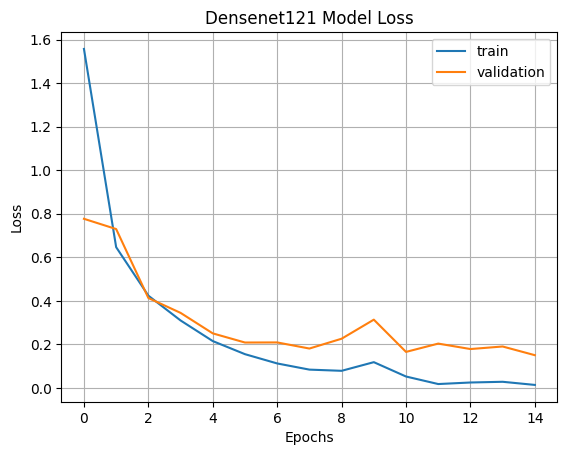

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Densenet121 Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

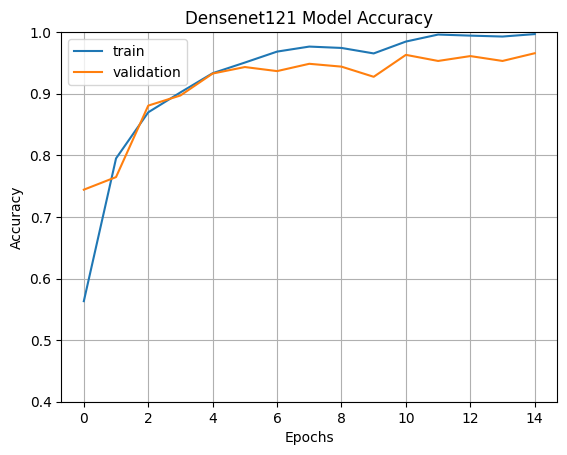

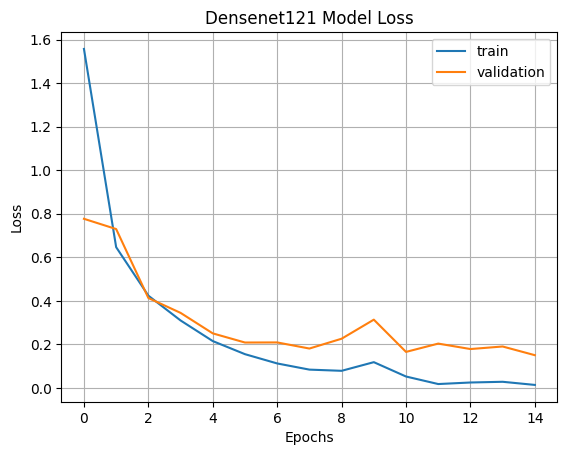

In [ ]:
# prompt: download the above graph with 300 dpi

fig1=plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Densenet121 Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])

# Save the plot with 300 dpi
plt.savefig('accuracy_plot.png', dpi=300)

# Download the saved plot
files.download('accuracy_plot.png')

plt.figure()  # Create a new figure for the loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Densenet121 Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])

# Save the loss plot with 300 dpi
plt.savefig('loss_plot.png', dpi=300)

# Download the loss plot
files.download('loss_plot.png')

In [ ]:
import cv2
import numpy as np

image_path = '/content/drive/MyDrive/GalliformeSpectra A Hen Breed Dataset/GalliformeSpectra A Hen Breed Dataset/Resized_Augmented_Dataset/train(Resized_Augmented)/newhampshire'  # Check this path!
image = cv2.imread(image_path)

if image is None:
    print(f"Error: Could not read image from {image_path}. Check if the path is correct and the file exists.")
else:
    image_resized = cv2.resize(image, (180, 180))
    image = np.expand_dims(image_resized, axis=0)
    print(image.shape)

Error: Could not read image from /content/drive/MyDrive/GalliformeSpectra A Hen Breed Dataset/GalliformeSpectra A Hen Breed Dataset/Resized_Augmented_Dataset/train(Resized_Augmented)/newhampshire. Check if the path is correct and the file exists.


In [ ]:
import cv2
import numpy as np

image_path = '/content/drive/MyDrive/GalliformeSpectra A Hen Breed Dataset/GalliformeSpectra A Hen Breed Dataset/Resized_Augmented_Dataset/train(Resized_Augmented)/newhampshire/newhampshire_AugRes_001 (1).png'  # Check this path!
image = cv2.imread(image_path)

if image is None:
    print(f"Error: Could not read image from {image_path}. Check if the path is correct and the file exists.")
else:
    image_resized = cv2.resize(image, (180, 180))
    image = np.expand_dims(image_resized, axis=0)
    print(image.shape)

    # Now that 'image' is verified, you can proceed with prediction
    pred = densenet_model.predict(image)
    print(pred)

(1, 180, 180, 3)
1/1 [==============================] - 2s 2s/step
[[8.3779186e-01 1.0385333e-04 1.4089867e-01 1.8344136e-04 6.3936710e-03
  4.1225838e-04 5.0987308e-03 3.4837967e-03 2.5486872e-03 3.0850368e-03]]


In [ ]:
classes_names = train_ds.class_names
print(classes_names)


['bielefelder', 'blackorpington', 'brahma', 'buckeye', 'fayoumi', 'leghorn', 'newhampshire', 'plymouthrock', 'sussex', 'turken']


In [ ]:
output_class=classes_names[np.argmax(pred)]
print(output_class)

bielefelder


In [ ]:
# prompt: give accuracy,precision,recall,f1 score for each class for
# this model

import numpy as np
from sklearn.metrics import classification_report

# Assuming 'val_ds' is your validation dataset
y_true = []
y_pred = []

for images, labels in val_ds:
  true_labels = np.argmax(labels, axis=1)
  y_true.extend(true_labels)
  predictions = densenet_model.predict(images)
  predicted_labels = np.argmax(predictions, axis=1)
  y_pred.extend(predicted_labels)

# Generate the classification report
report = classification_report(y_true, y_pred, target_names=classes_names)
print(report)


1/1 [==============================] - 2s 2s/step
                precision    recall  f1-score   support

   bielefelder       0.91      0.98      0.95       153
blackorpington       0.97      0.98      0.98       143
        brahma       0.96      0.97      0.97       147
       buckeye       0.97      0.99      0.98       167
       fayoumi       0.98      0.96      0.97       154
       leghorn       0.98      0.98      0.98       137
  newhampshire       0.97      0.94      0.96       162
  plymouthrock       1.00      0.99      0.99       154
        sussex       0.98      0.97      0.97       145
        turken       0.94      0.90      0.92       155

      accuracy                           0.97      1517
     macro avg       0.97      0.97      0.97      1517
  weighted avg       0.97      0.97      0.97      1517



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

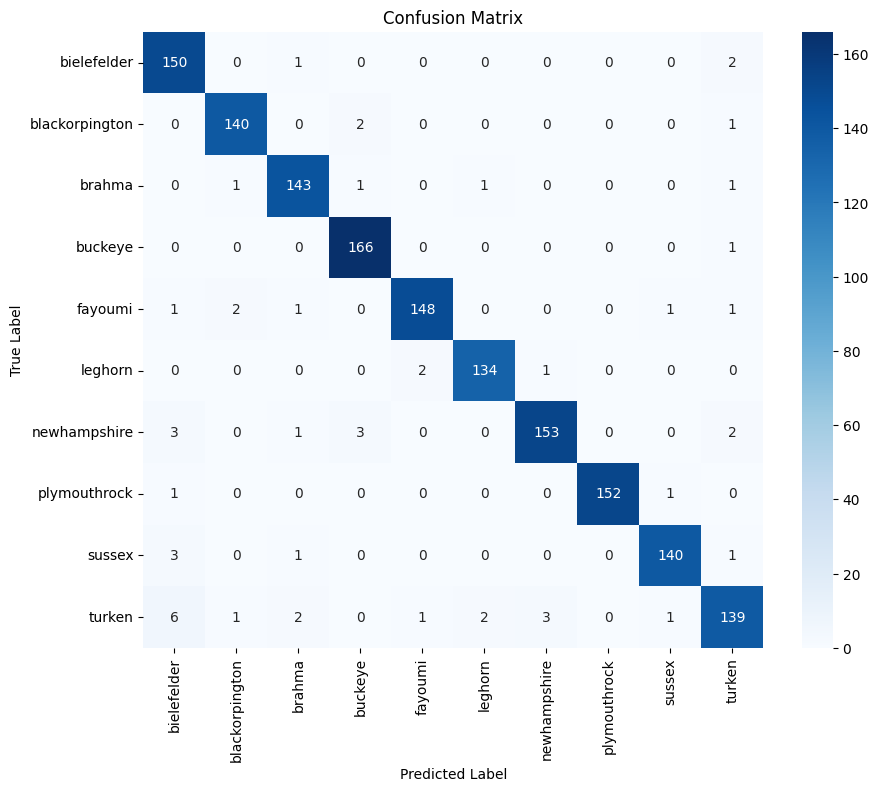

In [ ]:
# prompt: generate and download confusion matrix figure with 300 dpi

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes_names, yticklabels=classes_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Save the confusion matrix plot with 300 dpi
plt.savefig('confusion_matrix.png', dpi=300)

# Download the confusion matrix plot
files.download('confusion_matrix.png')